經過上述的介紹，這裡總結一下，在使用基因演算法時，一般而言，必須設定的幾個參數：

編碼方式 (Encoding method)
染色體的長度 (Chromosome length)
族群大小 (Population size)
交配方式 (Crossover method)
交配率 (Crossover rate)
突變方式 (Mutation method)
突變率 (Mutation rate)
適應函式 (Fitness function)
選擇機制 (Selection mechanism)
終止條件 (Termination condition)
,https://github.com/wurmen/Genetic-Algorithm-for-Job-Shop-Scheduling-and-NSGA-II/blob/master/implementation%20with%20python/GA-jobshop/GA_For_Jobshop.md

In [38]:
'''
GA: 主要是樣本大到無法在有限時間或資源內列出所有組合, 所以要在較短得時間內取得還不錯的解
    其實這樣的演算法並不一定能達到最佳解，只是能在相對較短的時間內得到一個還不錯的解
'''


# -*- coding: utf-8 -*-
"""
Created on Fri Jul 13 17:24:51 2018

Author: cheng-man wu
LinkedIn: www.linkedin.com/in/chengmanwu
Github: https://github.com/wurmen

"""
# 編碼原則
# 這裡的編碼方式很簡單，每個染色體就表示一組排程結果，因此，如果 flow shop 的問題中，共有10個Job要排，則每個染色體就由10個基因所組成，每個基因即代表某個Job，在程式裡，會透過 list 來儲存每個染色體，如下面所示：
'''==========Solving job shop scheduling problem by gentic algorithm in python======='''
# importing required modules
import pandas as pd
import numpy as np
import time
import copy

''' ================= initialization setting ======================'''

pt_tmp=pd.read_excel("JSP_dataset.xlsx",sheet_name="Processing Time",index_col =[0])
ms_tmp=pd.read_excel("JSP_dataset.xlsx",sheet_name="Machines Sequence",index_col =[0])

dfshape=pt_tmp.shape
num_mc=dfshape[1] # number of machines
num_job=dfshape[0] # number of jobs
num_gene=num_mc*num_job # number of genes in a chromosome
#每個染色體共有 10 x 10 = 100 個基因

pt=[list(map(int, pt_tmp.iloc[i])) for i in range(num_job)]
ms=[list(map(int,ms_tmp.iloc[i])) for i in range(num_job)]




In [39]:
dfshape

(10, 10)

In [40]:
ms_tmp

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
order,,,,,,,,,,
J1,1,2,3,4,5,6,7,8,9,10
J2,1,3,5,10,4,2,7,6,8,9
J3,2,1,4,3,9,6,8,7,10,5
J4,2,3,1,5,7,9,8,4,10,6
J5,3,1,2,6,4,5,9,8,10,7
J6,3,2,6,4,9,10,1,7,5,8
J7,2,1,4,3,7,6,10,9,8,5
J8,3,1,2,6,5,7,9,10,8,4
J9,1,2,4,6,3,10,7,8,5,9


In [41]:
ms

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [1, 3, 5, 10, 4, 2, 7, 6, 8, 9],
 [2, 1, 4, 3, 9, 6, 8, 7, 10, 5],
 [2, 3, 1, 5, 7, 9, 8, 4, 10, 6],
 [3, 1, 2, 6, 4, 5, 9, 8, 10, 7],
 [3, 2, 6, 4, 9, 10, 1, 7, 5, 8],
 [2, 1, 4, 3, 7, 6, 10, 9, 8, 5],
 [3, 1, 2, 6, 5, 7, 9, 10, 8, 4],
 [1, 2, 4, 6, 3, 10, 7, 8, 5, 9],
 [2, 1, 3, 7, 9, 10, 6, 4, 5, 8]]

In [42]:
pt_tmp

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
Time,,,,,,,,,,
J1,29,78,9,36,49,11,62,56,44,21
J2,43,90,75,11,69,28,46,46,72,30
J3,91,85,39,74,90,10,12,89,45,33
J4,81,95,71,99,9,52,85,98,22,43
J5,14,6,22,61,26,69,21,49,72,53
J6,84,2,52,95,48,72,47,65,6,25
J7,46,37,61,13,32,21,32,89,30,55
J8,31,86,46,74,32,88,19,48,36,79
J9,76,69,76,51,85,11,40,89,26,74


In [43]:
pt

[[29, 78, 9, 36, 49, 11, 62, 56, 44, 21],
 [43, 90, 75, 11, 69, 28, 46, 46, 72, 30],
 [91, 85, 39, 74, 90, 10, 12, 89, 45, 33],
 [81, 95, 71, 99, 9, 52, 85, 98, 22, 43],
 [14, 6, 22, 61, 26, 69, 21, 49, 72, 53],
 [84, 2, 52, 95, 48, 72, 47, 65, 6, 25],
 [46, 37, 61, 13, 32, 21, 32, 89, 30, 55],
 [31, 86, 46, 74, 32, 88, 19, 48, 36, 79],
 [76, 69, 76, 51, 85, 11, 40, 89, 26, 74],
 [85, 13, 61, 7, 64, 76, 47, 52, 90, 45]]

In [44]:

 
#樣本數, 染色體數量
population_size=int(input('Please input the size of population: ') or 30) # default:30 
#交配率, 每次隨機取值, 低於交配率才交配
crossover_rate=float(input('Please input the size of Crossover Rate: ') or 0.8) # default:0.8 
#突變率, 每次隨機取值, 低於突變率才突變
mutation_rate=float(input('Please input the size of Mutation Rate: ') or 0.2) # default:0.2 
#突變選擇基因比率
mutation_selection_rate=float(input('Please input the mutation selection rate: ') or 0.2) 
#突變基因數量
num_mutation_jobs=round(num_gene*mutation_selection_rate) 
#跑幾個世代
num_iteration=int(input('Please input number of iteration: ') or 2000) # default value is 2000 
    
start_time = time.time()

'''==================== main code ==============================='''
'''----- generate initial population -----'''
Tbest=999999999999999
best_list,best_obj=[],[]
population_list=[]
makespan_record=[]
#每個染色體共有 n=10 x m=10 = 100 個基因
#隨機產生30個0-99數值的染色體, 利用整除job數量的餘數(數值落在0-9之間)作為n個job number, 每個job出現m次
#-->隨機產生30個n個job走m個機台的seq
for i in range(population_size):
    nxm_random_num=list(np.random.permutation(num_gene)) # generate a random permutation of 0 to num_job*num_mc-1
    #print(np.random.permutation(num_gene)) #100的list 0-99
    '''
    np.random.permutation(num_gene)
    [79 40 76 80 20 60 48 28 94 23 77 65 38 52 85 53 25 32 54 36 70 75  6 95
     96 97 72 31 26 15 27 71 16 83 56 98  7 90 30 93 17 43 62 41 59 87  2 51
     19 37 21 99 13 12 91 74  4 92 34 49 84 67 69 55 73  9 47 68 58 78 44 86
      0 88 45 50 24 82 46  8 61 42 39 57 66 10 35  5 22  3 11 63 29 33 14 81
      1 18 64 89]
    '''
    population_list.append(nxm_random_num) # add to the population_list
    for j in range(num_gene):
        #用0-99除以job數取餘數, 可以產生n個job number, 且每個job出現m次-->每個job要走m個機台
        population_list[i][j]=population_list[i][j]%num_job # convert to job number format, every job appears m times
        '''
        population_list[i]
        [8, 7, 0, 1, 7, 2, 5, 4, 4, 0, 7, 6, 9, 0, 8, 6, 5, 1, 8, 0, 2, 6, 2, 6, 4, 8, 6, 4, 3, 6, 8, 2, 9, 0, 4, 1, 3, 5,
         9, 6, 2, 4, 9, 9, 1, 0, 0, 2, 1, 3, 5, 1, 0, 4, 7, 3, 2, 7, 5, 0, 9, 2, 1, 1, 6, 4, 5, 5, 7, 8, 6, 7, 4, 9, 3, 9,
         7, 5, 9, 8, 6, 1, 7, 5, 0, 4, 7, 3, 5, 3, 3, 8, 9, 2, 2, 3, 8, 8, 1, 3]
        '''
        
#population_list共有population_size=30個job seq, 每個job seq是10個job出現有m=10次, 即每個job seq為100個job number seq

optimal sequence [7, 3, 1, 7, 6, 7, 9, 7, 4, 8, 6, 5, 6, 4, 4, 1, 0, 4, 0, 1, 8, 3, 3, 4, 6, 6, 9, 6, 1, 3, 1, 5, 6, 3, 4, 2, 8, 5, 1, 0, 9, 7, 3, 6, 9, 7, 8, 8, 3, 8, 5, 6, 9, 5, 0, 4, 0, 0, 8, 2, 5, 9, 6, 8, 7, 3, 1, 1, 0, 2, 9, 5, 2, 4, 2, 4, 0, 1, 2, 5, 2, 0, 8, 5, 2, 1, 4, 9, 9, 0, 8, 7, 3, 7, 2, 9, 5, 7, 3, 2]
optimal value:1174.000000
the elapsed time:39.38284397125244


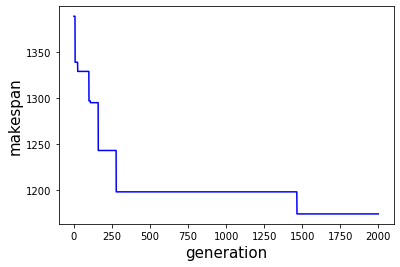

In [45]:
for n in range(num_iteration):
    Tbest_now=99999999999           
   
    '''-------- two point crossover 雙點交配--------'''
    parent_list=copy.deepcopy(population_list) #完全複製了一份副本，容器與容器中的元素地址都不一樣
    offspring_list=copy.deepcopy(population_list)
    S=list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover
    '''
    S
    [5, 8, 28, 1, 20, 25, 7, 24, 15, 13, 14, 10, 23, 4, 2, 27, 12, 9, 18, 17, 21, 6, 22, 11, 19, 29, 26, 16, 0, 3]
    '''
    for m in range(int(population_size/2)):
        crossover_prob=np.random.rand()
        if crossover_rate>=crossover_prob: #隨機取值, 小於交配率才交配
            #S編號第0個樣本跟S編號第1個樣本交配, S編號第2個樣本跟S編號第3個樣本交配...
            parent_1= population_list[S[2*m]][:]
            parent_2= population_list[S[2*m+1]][:]
            #print("parent_1")
            #print(parent_1)
            #print("parent_2")
            #print(parent_2)
            '''
            parent_1
            [0, 2, 6, 6, 0, 5, 1, 5, 5, 5, 8, 3, 6, 3, 3, 9, 9, 9, 3, 4, 3, 3, 4, 2, 6, 9, 6, 2, 8, 4, 8, 5, 7, 4, 3, 7, 7, 3, 3, 9, 7, 0, 6, 4, 0, 1, 2, 1, 8, 1, 5, 4, 9, 0, 2, 9, 9, 1, 6, 8, 4, 2, 7, 4, 7, 1, 6, 0, 0, 1, 0, 8, 8, 2, 5, 9, 7, 7, 6, 8, 2, 2, 7, 5, 6, 3, 9, 1, 4, 5, 8, 2, 7, 8, 0, 4, 1, 1, 0, 5]
            parent_2
            [1, 4, 4, 6, 4, 6, 6, 2, 8, 6, 6, 3, 3, 6, 5, 4, 3, 5, 5, 4, 3, 2, 8, 1, 7, 7, 5, 8, 3, 9, 6, 5, 9, 2, 8, 7, 7, 3, 2, 9, 7, 1, 0, 0, 9, 1, 2, 8, 3, 4, 9, 0, 2, 7, 4, 3, 7, 8, 1, 4, 5, 5, 2, 1, 5, 0, 1, 9, 0, 6, 7, 8, 6, 2, 3, 2, 2, 0, 8, 8, 9, 9, 5, 6, 0, 0, 4, 1, 4, 9, 8, 3, 7, 9, 7, 0, 1, 1, 0, 5]

            '''
            child_1=parent_1[:]
            child_2=parent_2[:]
            cutpoint=list(np.random.choice(num_gene, 2, replace=False))  #num_gene100個取2個replace=False, 抽出之後不放回, 不會抽到重覆
            #隨機取兩個位置, 兩點之間的基因做交換
            cutpoint.sort()
        
            child_1[cutpoint[0]:cutpoint[1]]=parent_2[cutpoint[0]:cutpoint[1]]
            child_2[cutpoint[0]:cutpoint[1]]=parent_1[cutpoint[0]:cutpoint[1]]
            offspring_list[S[2*m]]=child_1[:]
            offspring_list[S[2*m+1]]=child_2[:]
            #offspring_list紀錄交配後的基因序列 (染色體)
        
    
    '''----------repairment 修復-------------'''
    #兩點截斷後交配之後, 可能造成有的job多於m次, 有的job少於m次, 必須計算job的次數做修補
    for m in range(population_size):
        job_count={}
        larger,less=[],[] # 'larger' record jobs appear in the chromosome more than m times, and 'less' records less than m times.
        for i in range(num_job):
            if i in offspring_list[m]:
                count=offspring_list[m].count(i) #在第m個樣本中, job i出現的次數
                pos=offspring_list[m].index(i) #在第m個樣本中, job i出現的位置
                job_count[i]=[count,pos] # store the above two values to the job_count dictionary
            else:
                count=0
                job_count[i]=[count,0]
            if count>num_mc:
                larger.append(i)
            elif count<num_mc:
                less.append(i)
                
        #取lager中的job, 把該job的那個位置換成less中的其中一個job, 直到lareger的job不再過多        
        for k in range(len(larger)): #對每一個job出現次數過多的job做調整
            chg_job=larger[k]  #取larger中的job number
            while job_count[chg_job][0]>num_mc: #若job出現次數過多
                for d in range(len(less)):
                    if job_count[less[d]][0]<num_mc:                    
                        offspring_list[m][job_count[chg_job][1]]=less[d] #把多的job的index位置換成less job的job
                        job_count[chg_job][1]=offspring_list[m].index(chg_job) #job_count dictionay也要更新
                        job_count[chg_job][0]=job_count[chg_job][0]-1
                        job_count[less[d]][0]=job_count[less[d]][0]+1                    
                    if job_count[chg_job][0]==num_mc:
                        break     
    
    '''--------mutatuon 突變--------'''   
    for m in range(len(offspring_list)):
        mutation_prob=np.random.rand()
        if mutation_rate >= mutation_prob: #隨機取值, 小於突變率才突變
            #突變率0.2, 突變的job數量為100*0.2=20, 隨機取20個位置做突變
            m_chg=list(np.random.choice(num_gene, num_mutation_jobs, replace=False)) # chooses the position to mutation
            #print("m_chg")
            #print(m_chg)
            #[80, 29, 10, 26, 86, 41, 57, 58, 0, 91, 9, 84, 3, 46, 28, 97, 59, 23, 96, 94]
            t_value_last=offspring_list[m][m_chg[0]] # save the value which is on the first mutation position
            for i in range(num_mutation_jobs-1):
                offspring_list[m][m_chg[i]]=offspring_list[m][m_chg[i+1]] # displacement
                #第i個位置由i+1的值取代...
            
            offspring_list[m][m_chg[num_mutation_jobs-1]]=t_value_last # move the value of the first mutation position to the last mutation position
            #最後一個位置用第一個值取代
    
    '''--------fitness value(calculate makespan) 1/完工時間-------------'''
    total_chromosome=copy.deepcopy(parent_list)+copy.deepcopy(offspring_list) # parent and offspring chromosomes combination
    chrom_fitness,chrom_fit=[],[]
    total_fitness=0
    for m in range(population_size*2):
        j_keys=[j for j in range(num_job)]
        key_count={key:0 for key in j_keys}
        j_count={key:0 for key in j_keys}
        m_keys=[j+1 for j in range(num_mc)]
        m_count={key:0 for key in m_keys}
        '''
        j_keys
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
        key_count
        {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
        j_count
        {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
        m_keys
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        m_count
        {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}

        '''
        
        for i in total_chromosome[m]:
            gen_t=int(pt[i][key_count[i]]) #job i的第key_count次processTime, pt[3][0] processTime=81. pt[4][0]=14==>job4 pt=81, job5 pt=14
            gen_m=int(ms[i][key_count[i]]) #job i的第key_count次機器number
            j_count[i]=j_count[i]+gen_t    #jog i的累計processTime
            m_count[gen_m]=m_count[gen_m]+gen_t #機器gen_m的累計processTime 
            
            #把機台累計時間與job累計時間, 取最大時間, 更新機台/job最後時間
            if m_count[gen_m]<j_count[i]:
                m_count[gen_m]=j_count[i]
            elif m_count[gen_m]>j_count[i]:
                j_count[i]=m_count[gen_m]
            
            key_count[i]=key_count[i]+1
    
        makespan=max(j_count.values()) #完工時間=取最大的累計processTime
        chrom_fitness.append(1/makespan) #求解目標是取完工時間最小值, 所以fitness用倒數
        chrom_fit.append(makespan)
        total_fitness=total_fitness+chrom_fitness[m]

    
    '''----------selection(roulette wheel approach)----------'''
    #pk紀錄某染色體的fitness機率, qk紀錄從第一個累積到目前染色體的fitness機率和
    #隨機取值, 挑出對應的累積fittness的染色體, (例外處理, 如果隨機取的值小於所有的fitness, 則取第一個染色體)
    #總共取出population_size 30個染色體
    #輪盤是選取: fitness越大, 所占圓盤的扇形面積越大, 被選取的機率就越高-->可挑選到較佳的染色體, 同時也不會完全排除面前最差的染色體
    #如果每次只挑最佳的染色體, 容易造成早熟現象, 也就是挑選的染色體都過於相似, 很難走出區域最佳解, 可能無法跳出區域找到全域最佳解
    pk,qk=[],[]
    
    for i in range(population_size*2):
        pk.append(chrom_fitness[i]/total_fitness)
    for i in range(population_size*2):
        cumulative=0
        for j in range(0,i+1):
            cumulative=cumulative+pk[j]
        qk.append(cumulative)
    
    selection_rand=[np.random.rand() for i in range(population_size)] #隨機取值(0-1), 取population_size 30個
    
    for i in range(population_size):
        if selection_rand[i]<=qk[0]:
            population_list[i]=copy.deepcopy(total_chromosome[0])
        else:
            for j in range(0,population_size*2-1):
                if selection_rand[i]>qk[j] and selection_rand[i]<=qk[j+1]:
                    population_list[i]=copy.deepcopy(total_chromosome[j+1])
                    break
                    
    '''----------comparison----------'''
    #取這個世代的最佳染色體(最佳job sequence)
    for i in range(population_size*2):
        if chrom_fit[i]<Tbest_now:
            Tbest_now=chrom_fit[i]
            sequence_now=copy.deepcopy(total_chromosome[i])
    #紀錄目前為止所有世代最佳染色體(最佳job sequence)
    if Tbest_now<=Tbest:
        Tbest=Tbest_now
        sequence_best=copy.deepcopy(sequence_now)
        
    makespan_record.append(Tbest)
'''----------result----------'''
print("optimal sequence",sequence_best) #最佳job sequence
print("optimal value:%f"%Tbest) #完工時間 
print('the elapsed time:%s'% (time.time() - start_time)) 
#GA是運算成本高的演算法, 除了嘗試找到最佳解, 能在有限時間資源內找到也是關注的重點

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([i for i in range(len(makespan_record))],makespan_record,'b')
plt.ylabel('makespan',fontsize=15)
plt.xlabel('generation',fontsize=15)
plt.show()

In [46]:
'''--------plot gantt chart-------'''
'''
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context
'''
import pandas as pd
import chart_studio.plotly as py
import plotly.figure_factory as ff
import datetime

m_keys=[j+1 for j in range(num_mc)]  #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
j_keys=[j for j in range(num_job)]   #[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
key_count={key:0 for key in j_keys}  #{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
j_count={key:0 for key in j_keys}    #{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
m_count={key:0 for key in m_keys}    #{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
j_record={}

print(sequence_best)
'''
job seq:sequence_best
[5, 0, 4, 7, 4, 6, 0, 0, 4, 5, 1, 5, 5, 5, 1, 6, 4, 3, 6, 6, 6, 4, 7, 3, 1, 1, 0, 5, 9, 6, 7, 9, 4, 0, 6, 8, 9, 4, 0, 3, 7, 8, 0, 8, 3, 5, 1, 9, 5, 2, 5, 3, 2, 1, 6, 1, 3, 8, 7, 2, 0, 9, 9, 7, 2, 6, 1, 9, 2, 3, 1, 2, 5, 2, 7, 8, 8, 6, 8, 3, 3, 3, 9, 2, 9, 7, 8, 4, 7, 7, 8, 9, 2, 0, 4, 4, 1, 2, 0, 8]
-->j4, j5, j10, j3, ...
-->m2, m3, m2, m2, ...
'''
for i in sequence_best:
    gen_t=int(pt[i][key_count[i]]) #pt[5][0] processTime=81. pt[0][0]=14==>job4 pt=81, job5 pt=14
    gen_m=int(ms[i][key_count[i]]) #ms[3][0] machine=2, ms[4][0]=3
    j_count[i]=j_count[i]+gen_t #job i的processTime
    m_count[gen_m]=m_count[gen_m]+gen_t #machine gen_m的processTime
    print(i,'processTime:',gen_t,'machine',gen_m) 
    #機台的時間與job的時間相比, 取最大 (因為可能須排隊)
    if m_count[gen_m]<j_count[i]:
        m_count[gen_m]=j_count[i]
    elif m_count[gen_m]>j_count[i]:
        j_count[i]=m_count[gen_m]
    
    start_time=str(datetime.timedelta(seconds=j_count[i]-pt[i][key_count[i]])) # convert seconds to hours, minutes and seconds
    end_time=str(datetime.timedelta(seconds=j_count[i]))
        
    j_record[(i,gen_m)]=[start_time,end_time]  #job i在機台m的時間區間
    
    key_count[i]=key_count[i]+1
    '''
    print(key_count)
    每個job算完processTime之後, 用key_count控制取下一次的job processTime
    key_count 
    {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0} --> 3: job4算完第1次pt, count+1
    {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0} --> 4: job5算完第1次pt, count+1
    {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0} -->
    {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1} -->...
    '''

df=[]
for m in m_keys:
    for j in j_keys:
        df.append(dict(Task='Machine %s'%(m), Start='2018-07-14 %s'%(str(j_record[(j,m)][0])), Finish='2018-07-14 %s'%(str(j_record[(j,m)][1])),Resource='Job %s'%(j+1)))
    
fig = ff.create_gantt(df, index_col='Resource', show_colorbar=True, group_tasks=True, showgrid_x=True, title='Job shop Schedule')
#py.iplot(fig, filename='GA_job_shop_scheduling', world_readable=True) #-->SSL required
fig.show()

[7, 3, 1, 7, 6, 7, 9, 7, 4, 8, 6, 5, 6, 4, 4, 1, 0, 4, 0, 1, 8, 3, 3, 4, 6, 6, 9, 6, 1, 3, 1, 5, 6, 3, 4, 2, 8, 5, 1, 0, 9, 7, 3, 6, 9, 7, 8, 8, 3, 8, 5, 6, 9, 5, 0, 4, 0, 0, 8, 2, 5, 9, 6, 8, 7, 3, 1, 1, 0, 2, 9, 5, 2, 4, 2, 4, 0, 1, 2, 5, 2, 0, 8, 5, 2, 1, 4, 9, 9, 0, 8, 7, 3, 7, 2, 9, 5, 7, 3, 2]
7 processTime: 31 machine 3
3 processTime: 81 machine 2
1 processTime: 43 machine 1
7 processTime: 86 machine 1
6 processTime: 46 machine 2
7 processTime: 46 machine 2
9 processTime: 85 machine 2
7 processTime: 74 machine 6
4 processTime: 14 machine 3
8 processTime: 76 machine 1
6 processTime: 37 machine 1
5 processTime: 84 machine 3
6 processTime: 61 machine 4
4 processTime: 6 machine 1
4 processTime: 22 machine 2
1 processTime: 90 machine 3
0 processTime: 29 machine 1
4 processTime: 61 machine 6
0 processTime: 78 machine 2
1 processTime: 75 machine 5
8 processTime: 69 machine 2
3 processTime: 95 machine 3
3 processTime: 71 machine 1
4 processTime: 26 machine 4
6 processTime: 13 machine 3


In [47]:
ms

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [1, 3, 5, 10, 4, 2, 7, 6, 8, 9],
 [2, 1, 4, 3, 9, 6, 8, 7, 10, 5],
 [2, 3, 1, 5, 7, 9, 8, 4, 10, 6],
 [3, 1, 2, 6, 4, 5, 9, 8, 10, 7],
 [3, 2, 6, 4, 9, 10, 1, 7, 5, 8],
 [2, 1, 4, 3, 7, 6, 10, 9, 8, 5],
 [3, 1, 2, 6, 5, 7, 9, 10, 8, 4],
 [1, 2, 4, 6, 3, 10, 7, 8, 5, 9],
 [2, 1, 3, 7, 9, 10, 6, 4, 5, 8]]

In [48]:
pt

[[29, 78, 9, 36, 49, 11, 62, 56, 44, 21],
 [43, 90, 75, 11, 69, 28, 46, 46, 72, 30],
 [91, 85, 39, 74, 90, 10, 12, 89, 45, 33],
 [81, 95, 71, 99, 9, 52, 85, 98, 22, 43],
 [14, 6, 22, 61, 26, 69, 21, 49, 72, 53],
 [84, 2, 52, 95, 48, 72, 47, 65, 6, 25],
 [46, 37, 61, 13, 32, 21, 32, 89, 30, 55],
 [31, 86, 46, 74, 32, 88, 19, 48, 36, 79],
 [76, 69, 76, 51, 85, 11, 40, 89, 26, 74],
 [85, 13, 61, 7, 64, 76, 47, 52, 90, 45]]

In [49]:
key_count

{0: 10, 1: 10, 2: 10, 3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10, 9: 10}